# Assignment 3
## Topics 7 - 8


This assignment is performed **in pairs** following the *Groups for Assignments* list.

To turn the assignment in, upload it to the task that has been created in moodle before midnight on Tuesday, November 29.

Please, indicate your names in the notebook.

--- 



## 1. Introduction

<p><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fpopgeeks.com%2Fwp-content%2Fuploads%2F2019%2F07%2F5afc8451804d0e9f1a000003.jpeg&f=1&nofb=1&ipt=46b4d14157c2d4d48f7852403cb60dad9e27c8e5a6069088f9171be246941914&ipo=images" alt="Starcourt Mall"></p>


You work in the management of a shopping mall. You have some information about the people who shop at the mall such as *Customer ID, age, gender, annual income* and *spending score* (a measure of  purchasing behavior).

You are in charge of a marketing project that aims at defining offers targeted to specific consumer segments. In order to do so, you will need to perform a analysis of the information you have, and pass your conclussions to the team that will define this strategy.

## 2. What characterizes these individuals?

Perform a descriptive analysis on the features of this daataset. This will require to obtain basic statistics and plots of each of them, as well as a visualization of their relationships.

In [46]:
import pandas as pd

df = pd.read_csv('dataset/Mall_Customers.csv')
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [47]:
# Drop ID column and convert gender to numeric
df = df.drop('CustomerID', axis=1)

In [48]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
encoded_sex = encode.fit_transform(df.iloc[:, 0])
print(encoded_sex)

df['Gender'] = encoded_sex


[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [49]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

In [50]:
df.describe()

Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000

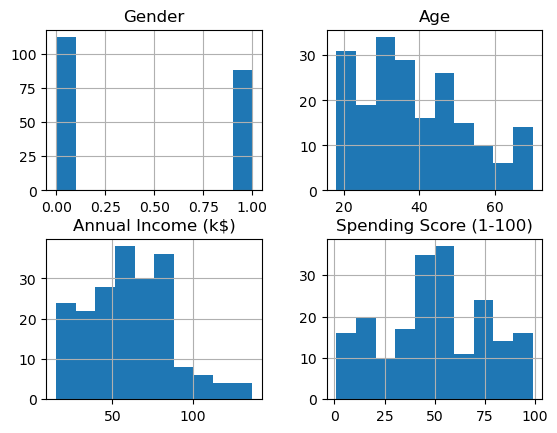

In [51]:
import matplotlib.pyplot as plt

df.hist()
plt.show()

array([[<AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Gender'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score 

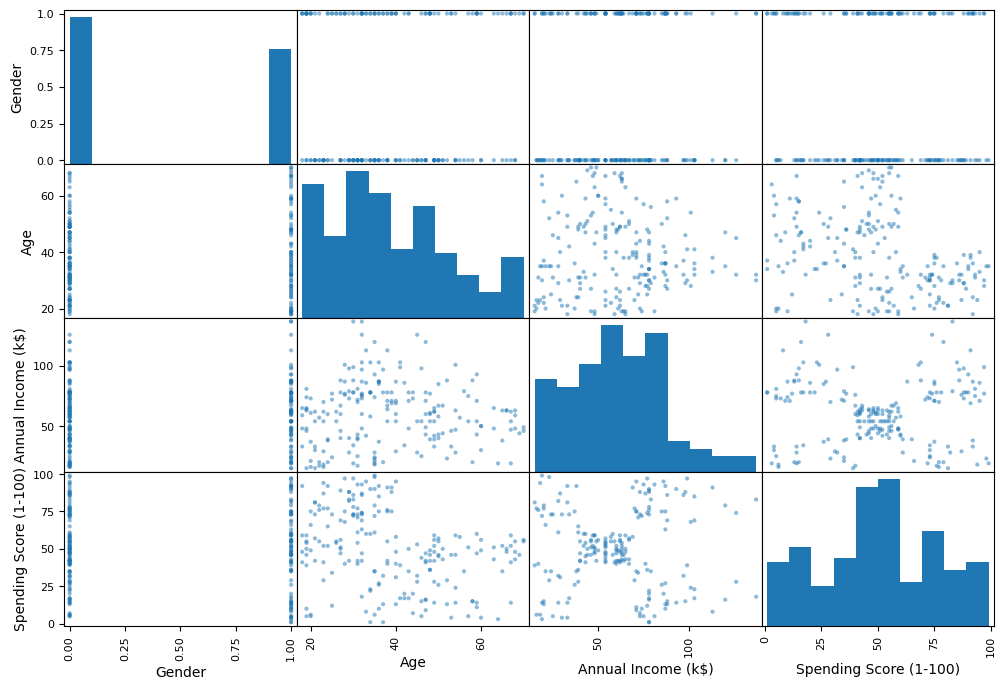

In [52]:
from pandas.plotting import scatter_matrix

features = df.columns
scatter_matrix(df[features], figsize=(12,8))

## 3. How you should categorize individuals?

In order to target and better define discounts and sales, you want to identify clearly differentiated groups of customers. According to the data exploration you developed above, what are the two most suitable variables to perform this analysis? Plot their scatterplot.

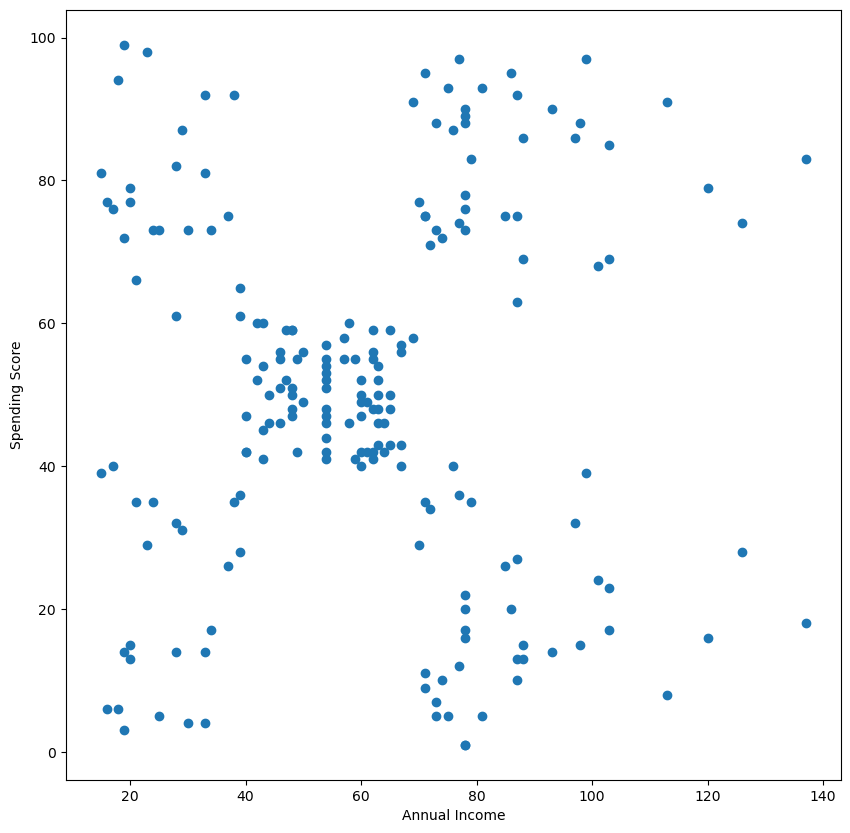

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()



## 2. Which type of consumers visit this mall?

Implement a K-means clustering using only those two most suitable variables. For starters, run it for 3 clusters (please use as seed 1812)

In [54]:
# First extract the two features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

# Then clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1812)
kmeans.fit(X)


c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1812)

 Create a visualization of the clusters that your model has found.

In [13]:
y = kmeans.predict(X)
X['Cluster'] = y
X

C:\Users\javie\AppData\Local\Temp\ipykernel_9124\135654895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = y


Annual Income (k$)  Spending Score (1-100)  Cluster
0                    15                      39        1
1                    15                      81        1
2                    16                       6        1
3                    16                      77        1
4                    17                      40        1
..                  ...                     ...      ...
195                 120                      79        0
196                 126                      28        2
197                 126                      74        0
198                 137                      18        2
199                 137                      83        0

[200 rows x 3 columns]

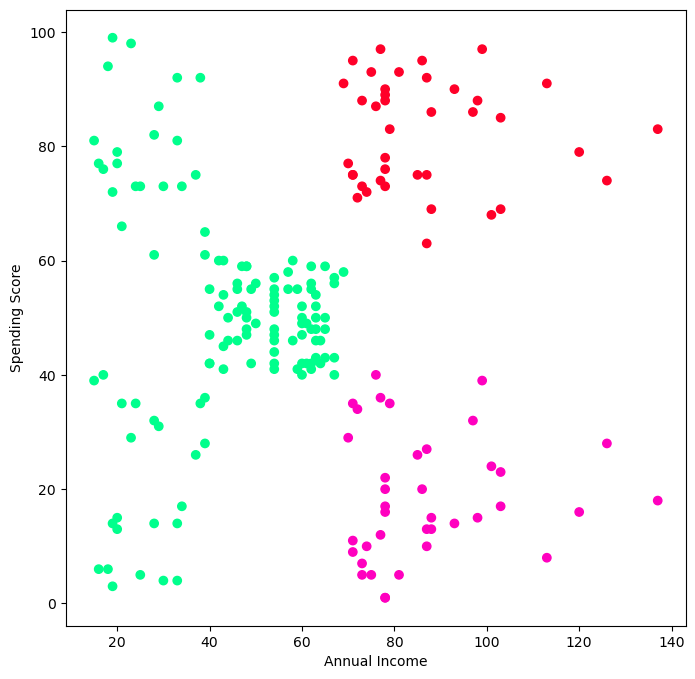

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=y, cmap='gist_rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Do you think that this a good categorization?

YOUR ANSWER HERE

Since you don't really know if a different numbers of clusters would have performed better, run an analysis to be able to provide a justified choice of the optimal number. Plot all your findings.

In [15]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=1812).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarn

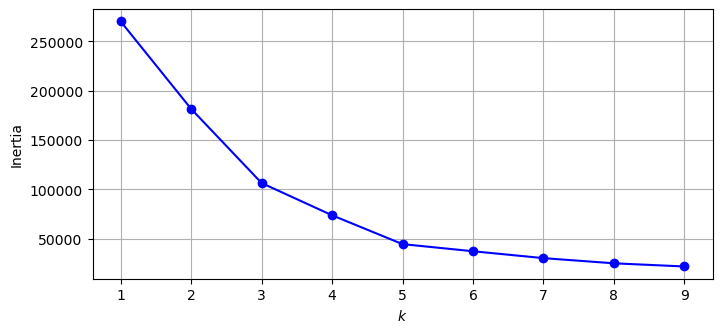

In [16]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid()
plt.show()

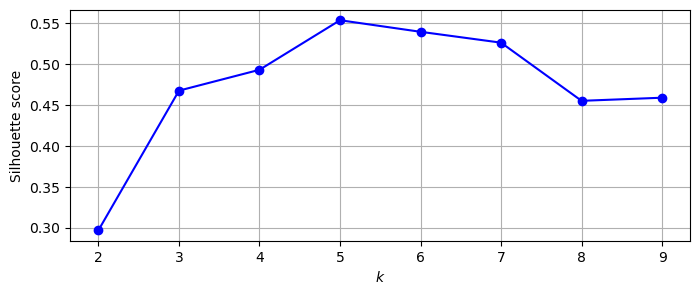

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

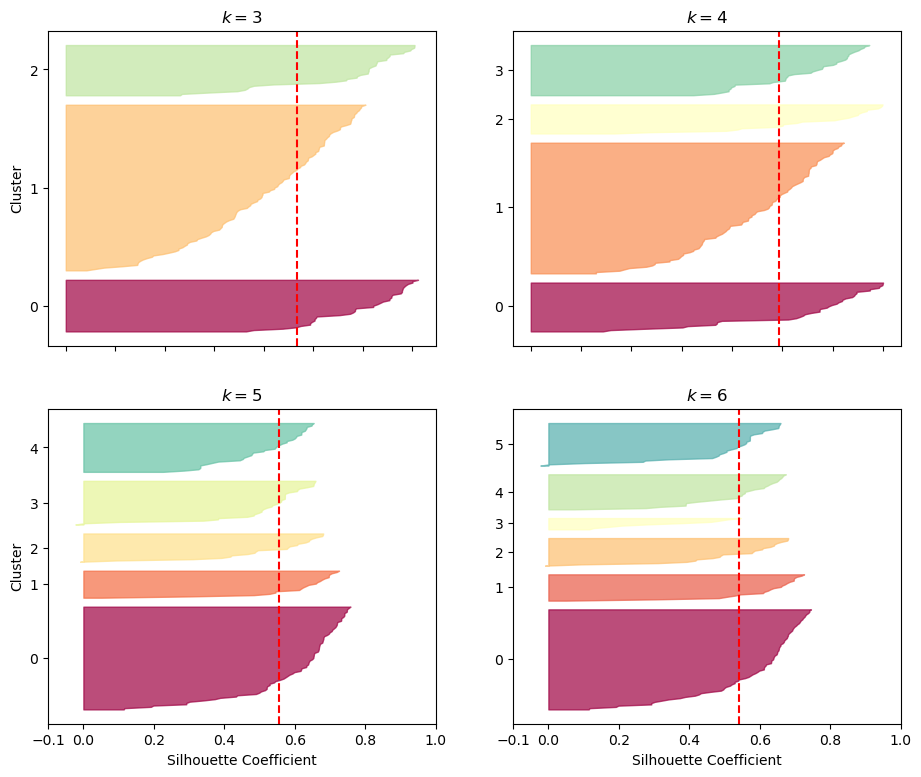

In [18]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import numpy as np

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

#save_fig("silhouette_analysis_plot")
plt.show()

## 3. This is my clientele

Now, decide on the optimal number of clusters, run the model for them, predict, and plot. Then, provide an **INTUITIVE EXPLANATION** of each cluster. Actually, give a name to each cluster that defines the individuals that compose them.

c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\javie\AppData\Local\Temp\ipykernel_9124\429846710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = y_5


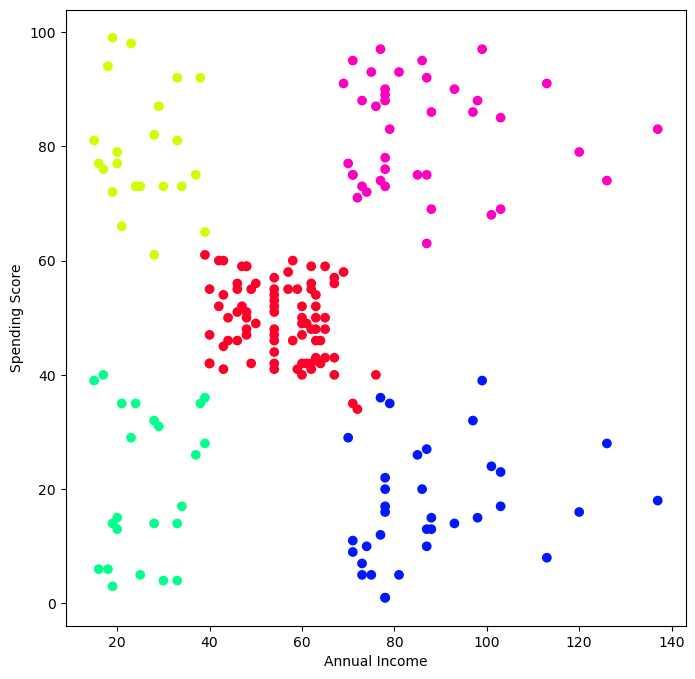

In [19]:
kmeans_5 = KMeans(n_clusters=5, random_state=1812)
kmeans_5.fit(X)
y_5 = kmeans_5.predict(X)
X['Cluster'] = y_5

plt.figure(figsize=(8,8))
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=y_5, cmap='gist_rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

1. Light Green Cluster: The customers who have low income and spend much money. We can assume this is the unbalance cluster.
2. Pink Cluster: The customers who have high income and spend much money. We can assume this is the rich guy cluster.
3. Red Cluster: The customers who have middle income and spend not so much and not so less money. We can assume this is the balance cluster.
4. Green Cluster: The customers who have low income and spend less money. We can assume this is the well-managed cluster.
5. Blue Cluster: The customers who have high income and spend less money. We can assume this is the 'don't like shopping' cluster

---

### 4. A more comprehensive analysis

Now run a cluster analysis using **all** variables. Once you have fitted your model, since it is composed of more than two variables, you won't be able to plot them. However, find a way of providing a description of the clusters. 

In [59]:
kmeans_all = KMeans(n_clusters=5)
clustering = kmeans_all.fit(df)

c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [60]:
clustering.cluster_centers_

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

## 5. Now, the other way around

Run the same analysis using a reduction of all variables. It must gather 95% of the variability of the data.

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

kmeans_per_k = [KMeans(n_clusters=k, random_state=1812).fit(X_reduced)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarn

[270140.99616224185, 181395.73894608853, 106205.24142427386, 73615.76160255469, 44415.97237292415, 37209.4671320263, 30245.710130003925, 25000.144209243692, 21799.654827936207]


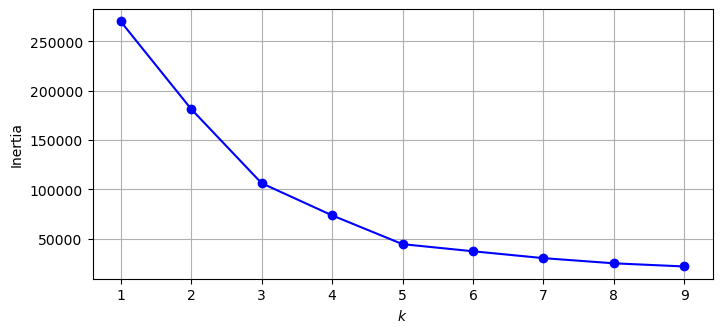

In [36]:
print(inertias)

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid()
plt.show()

c:\Users\javie\AppData\Local\R-MINI~1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


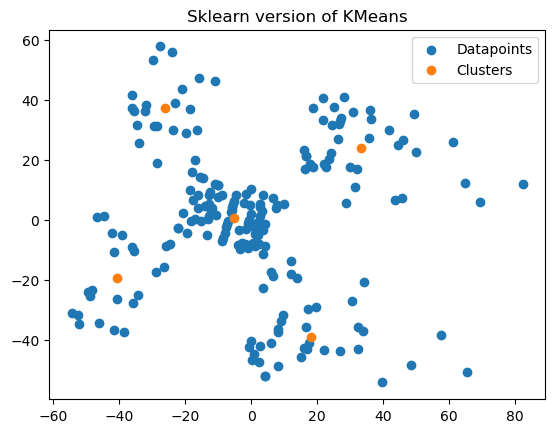

In [42]:
kmeans_pca = KMeans(n_clusters=5)
cluster = kmeans_pca.fit(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

To what extent this results are similar to those without obtained applying a dimensionality reduction?

Whay would one proceed like this? What are the pros and cons?

In [44]:
kmeans_5.cluster_centers_

array([[5.52962963e+01, 4.95185185e+01, 1.03703704e+00],
       [2.57272727e+01, 7.93636364e+01, 1.00000000e+00],
       [2.63043478e+01, 2.09130435e+01, 1.00000000e+00],
       [8.82000000e+01, 1.71142857e+01, 2.00000000e+00],
       [8.65384615e+01, 8.21282051e+01, 2.22044605e-16]])